In [1]:
#import the DF
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import nltk

In [2]:
df = pd.read_csv('DF_After_DataCleaning.csv', header = 0, sep = ',')

<AxesSubplot:>

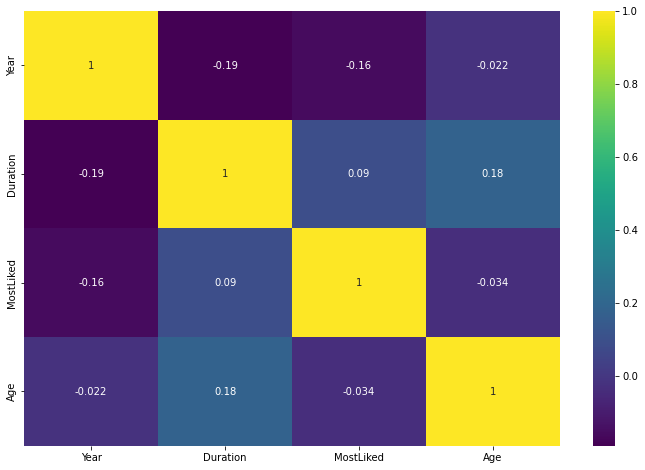

In [3]:
#corolation between columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

## example of two columns without corolation

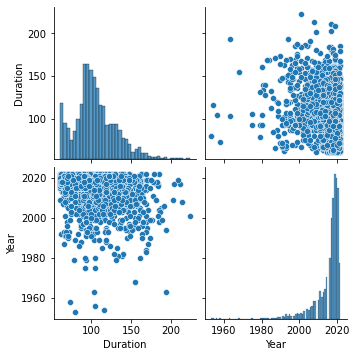

In [4]:
sns.pairplot(df[['Duration', 'Year']])

In [5]:
#Checks the prevalence of a column MostLiked
df['MostLiked'].value_counts(normalize=True)

0.0    0.980608
1.0    0.019392
Name: MostLiked, dtype: float64

In [6]:
df.columns

Index(['Title', 'Year', 'Duration', 'MostLiked', 'Description', 'Director',
       'FullCast', 'GenreFull', 'AboutFull', 'Age'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2630 non-null   object 
 1   Year         2630 non-null   float64
 2   Duration     2630 non-null   int64  
 3   MostLiked    2630 non-null   float64
 4   Description  2630 non-null   object 
 5   Director     2630 non-null   object 
 6   FullCast     2630 non-null   object 
 7   GenreFull    2630 non-null   object 
 8   AboutFull    2630 non-null   object 
 9   Age          2630 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 205.6+ KB


In [8]:
df.describe()

,Year,Duration,MostLiked,Age
count,2630.000000,2630.000000,2630.000000,2630.000000
mean,2015.559316,104.571103,0.019392,13.169582
std,7.416641,24.917118,0.137923,3.913595
min,1953.000000,61.000000,0.000000,0.000000
25%,2014.000000,90.000000,0.000000,13.000000
50%,2018.000000,101.000000,0.000000,13.000000
75%,2020.000000,118.000000,0.000000,16.000000
max,2022.000000,223.000000,1.000000,18.000000


Text(0.5, 1.0, 'Age Distribution')

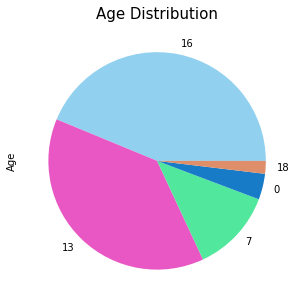

In [9]:
mycolors = ['#92D0F0', '#E857C3','#51E79C', '#187BC8','#DE8F6A']
df['Age'].value_counts().plot(kind='pie',figsize=(10,5), colors=mycolors)
plt.title('Age Distribution', size = 15)

Text(0, 0.5, 'Count')

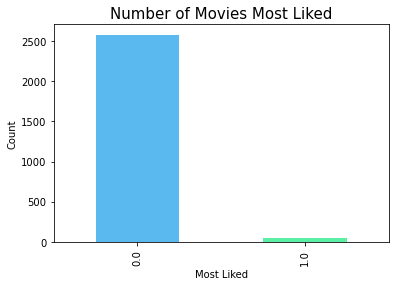

In [10]:
mycolors = ['#5AB9EF', '#5AEFA5']
df["MostLiked"].value_counts().plot(kind='bar', color = mycolors)
plt.title('Number of Movies Most Liked', size=15)
plt.xlabel('Most Liked')
plt.ylabel('Count')

Text(0.5, 1.0, 'Popular Ganres')

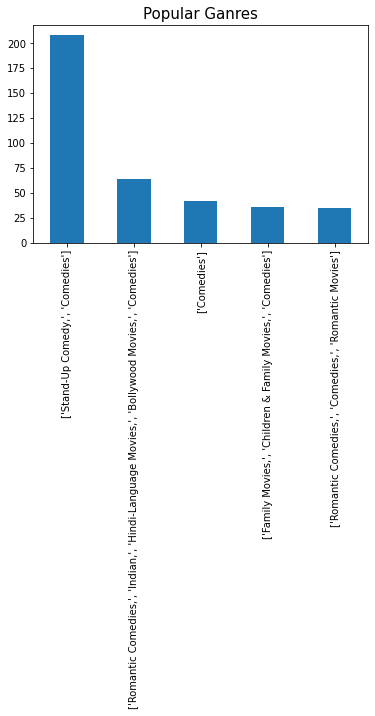

In [11]:
df['GenreFull'].value_counts().loc[lambda x:x>30].plot(kind='bar')
plt.title('Popular Ganres',size=15)

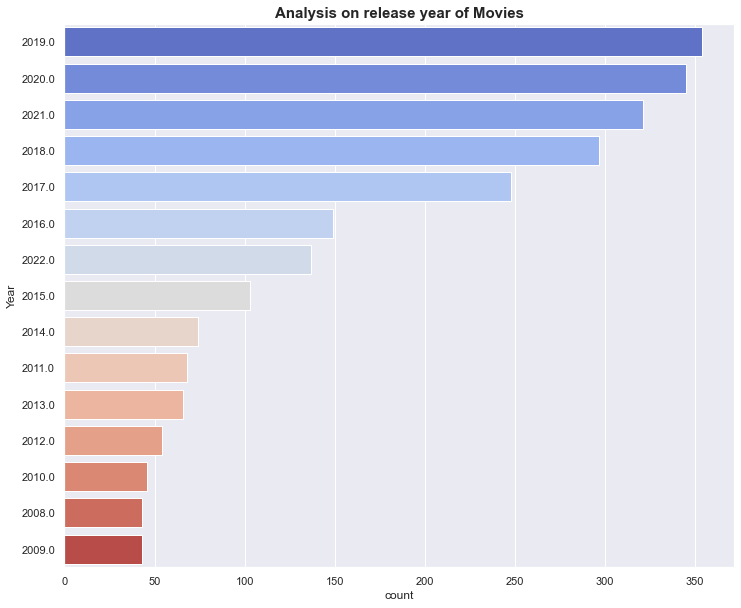

In [12]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Year", data=df, palette="coolwarm", order=df['Year'].value_counts().index[0:15])

plt.title('Analysis on release year of Movies', fontsize=15, fontweight='bold')
plt.show()

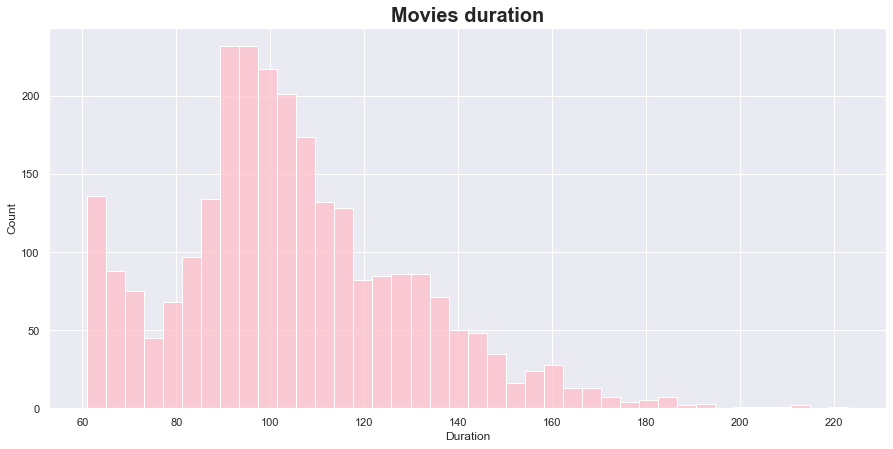

In [13]:
plt.figure(figsize=(15,7))
sns.histplot(df['Duration'],kde=False, color=['pink'])
plt.title('Movies duration',fontweight="bold",size=20)
plt.show()

In [14]:
#show for each year how many movies is most liked or not
ty = pd.crosstab(df['Year'], df['MostLiked'])

In [15]:
#NORMALIZE
ty1 = pd.crosstab(df['Year'], df['MostLiked'], normalize = 'index')
ty1

MostLiked,0.0,1.0
Year,,
1953.0,1.000000,0.000000
1954.0,1.000000,0.000000
1956.0,1.000000,0.000000
1958.0,1.000000,0.000000
1963.0,1.000000,0.000000
1968.0,1.000000,0.000000
1975.0,1.000000,0.000000
1979.0,1.000000,0.000000
1980.0,1.000000,0.000000


Text(0, 0.5, 'Most liked frequency')

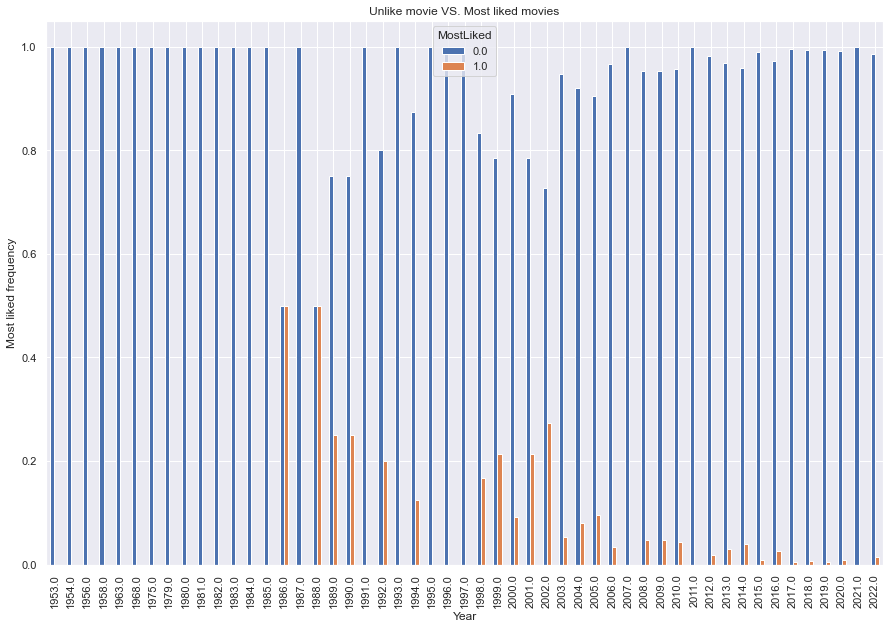

In [16]:
ty1.plot(kind='bar', figsize=(15,10))
plt.title('Unlike movie VS. Most liked movies')
plt.xlabel('Year')
plt.ylabel('Most liked frequency')

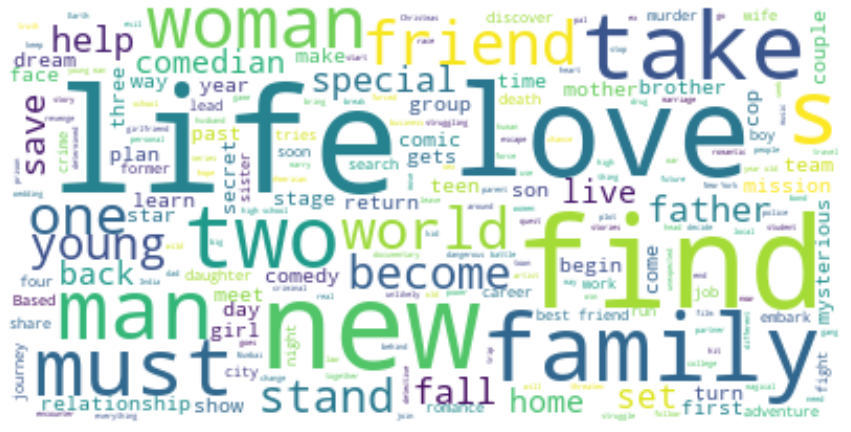

In [17]:
text = " ".join(i for i in df.Description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
df["GenreFull"] = df["GenreFull"].apply(eval)

In [19]:
df['GenreFull'] = df['GenreFull'].replace(', ', '","')
df['GenreFull'] = df['GenreFull'].replace('[', '["')
df['GenreFull'] = df['GenreFull'].replace(']', '"]')

In [20]:
Genre_disc = {}
for i in df["GenreFull"]:
    for j in i:
        if j not in Genre_disc:
            Genre_disc[j] = 1
        else:
            Genre_disc[j] += 1

In [21]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [22]:
to_1D(df["GenreFull"]).value_counts()


Comedies                      693
Indian,                       484
Dramas,                       479
Comedies,                     440
Romantic Movies               404
                             ... 
TV Shows Based on Comics,       1
Westerns                        1
Hindi-Language Movies           1
Ukrainian,                      1
K-Dramas based on Webtoon,      1
Length: 182, dtype: int64

Text(0.5, 1.0, 'Genre frequency')

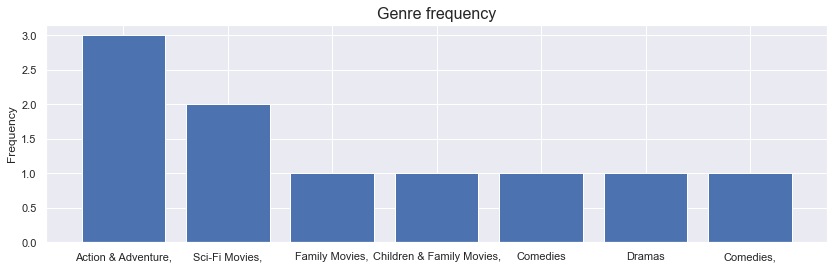

In [23]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df["GenreFull"]).iloc[:10].value_counts().index,
        to_1D(df["GenreFull"]).iloc[:10].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Genre frequency", size = 16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

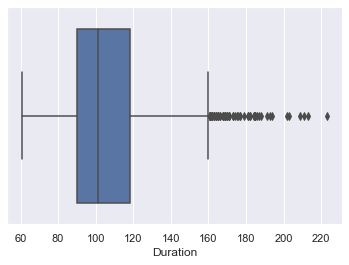

In [24]:
sns.boxplot(df.Duration)